In [2]:
import litelearn as ll
import seaborn as sns

# regression

the following cols contain null values and will be filled naively:
numerical columns:
[]
categorical columns:
['sex']
casting species onto numerical values
casting island onto numerical values
casting sex onto numerical values
casting sex_is_missing onto numerical values
None
using categories: []


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.040673
0:	learn: 760.9402302	test: 825.4944468	best: 825.4944468 (0)	total: 138ms	remaining: 2m 17s
1:	learn: 737.6844856	test: 802.0033119	best: 802.0033119 (1)	total: 140ms	remaining: 1m 9s
2:	learn: 717.6250739	test: 781.2716117	best: 781.2716117 (2)	total: 142ms	remaining: 47.2s
3:	learn: 695.9221313	test: 758.3026819	best: 758.3026819 (3)	total: 144ms	remaining: 35.8s
4:	learn: 675.6829548	test: 738.1639162	best: 738.1639162 (4)	total: 146ms	remaining: 29s
5:	learn: 656.0141370	test: 717.6480316	best: 717.6480316 (5)	total: 147ms	remaining: 24.3s
6:	learn: 636.2964493	test: 697.0226739	best: 697.0226739 (6)	total: 148ms	remaining: 21s
7:	learn: 618.1482604	test: 677.8065164	best: 677.8065164 (7)	total: 150ms	remaining: 18.6s
8:	learn: 600.9685064	test: 660.4210375	best: 660.4210375 (8)	total: 152ms	remaining: 16.7s
9:	learn: 585.8899808	test: 644.6262093	best: 644.6262093 (9)	total: 153ms	remaining: 15.2s
10:	learn: 570.2843712	test: 628.1276803	best: 628.12

,rmse,support
train,214.590700,239
test,304.209831,103


,Feature Id,Importances
0,species,33.730919
1,sex,28.510025
2,flipper_length_mm,15.687447
3,bill_depth_mm,9.694559
4,bill_length_mm,7.510131
5,island,4.226289
6,sex_is_missing,0.640629


,rmse,support
train,214.590700,239
test,304.209831,103


,Feature Id,Importances
0,species,33.730919
1,sex,28.510025
2,flipper_length_mm,15.687447
3,bill_depth_mm,9.694559
4,bill_length_mm,7.510131
5,island,4.226289
6,sex_is_missing,0.640629


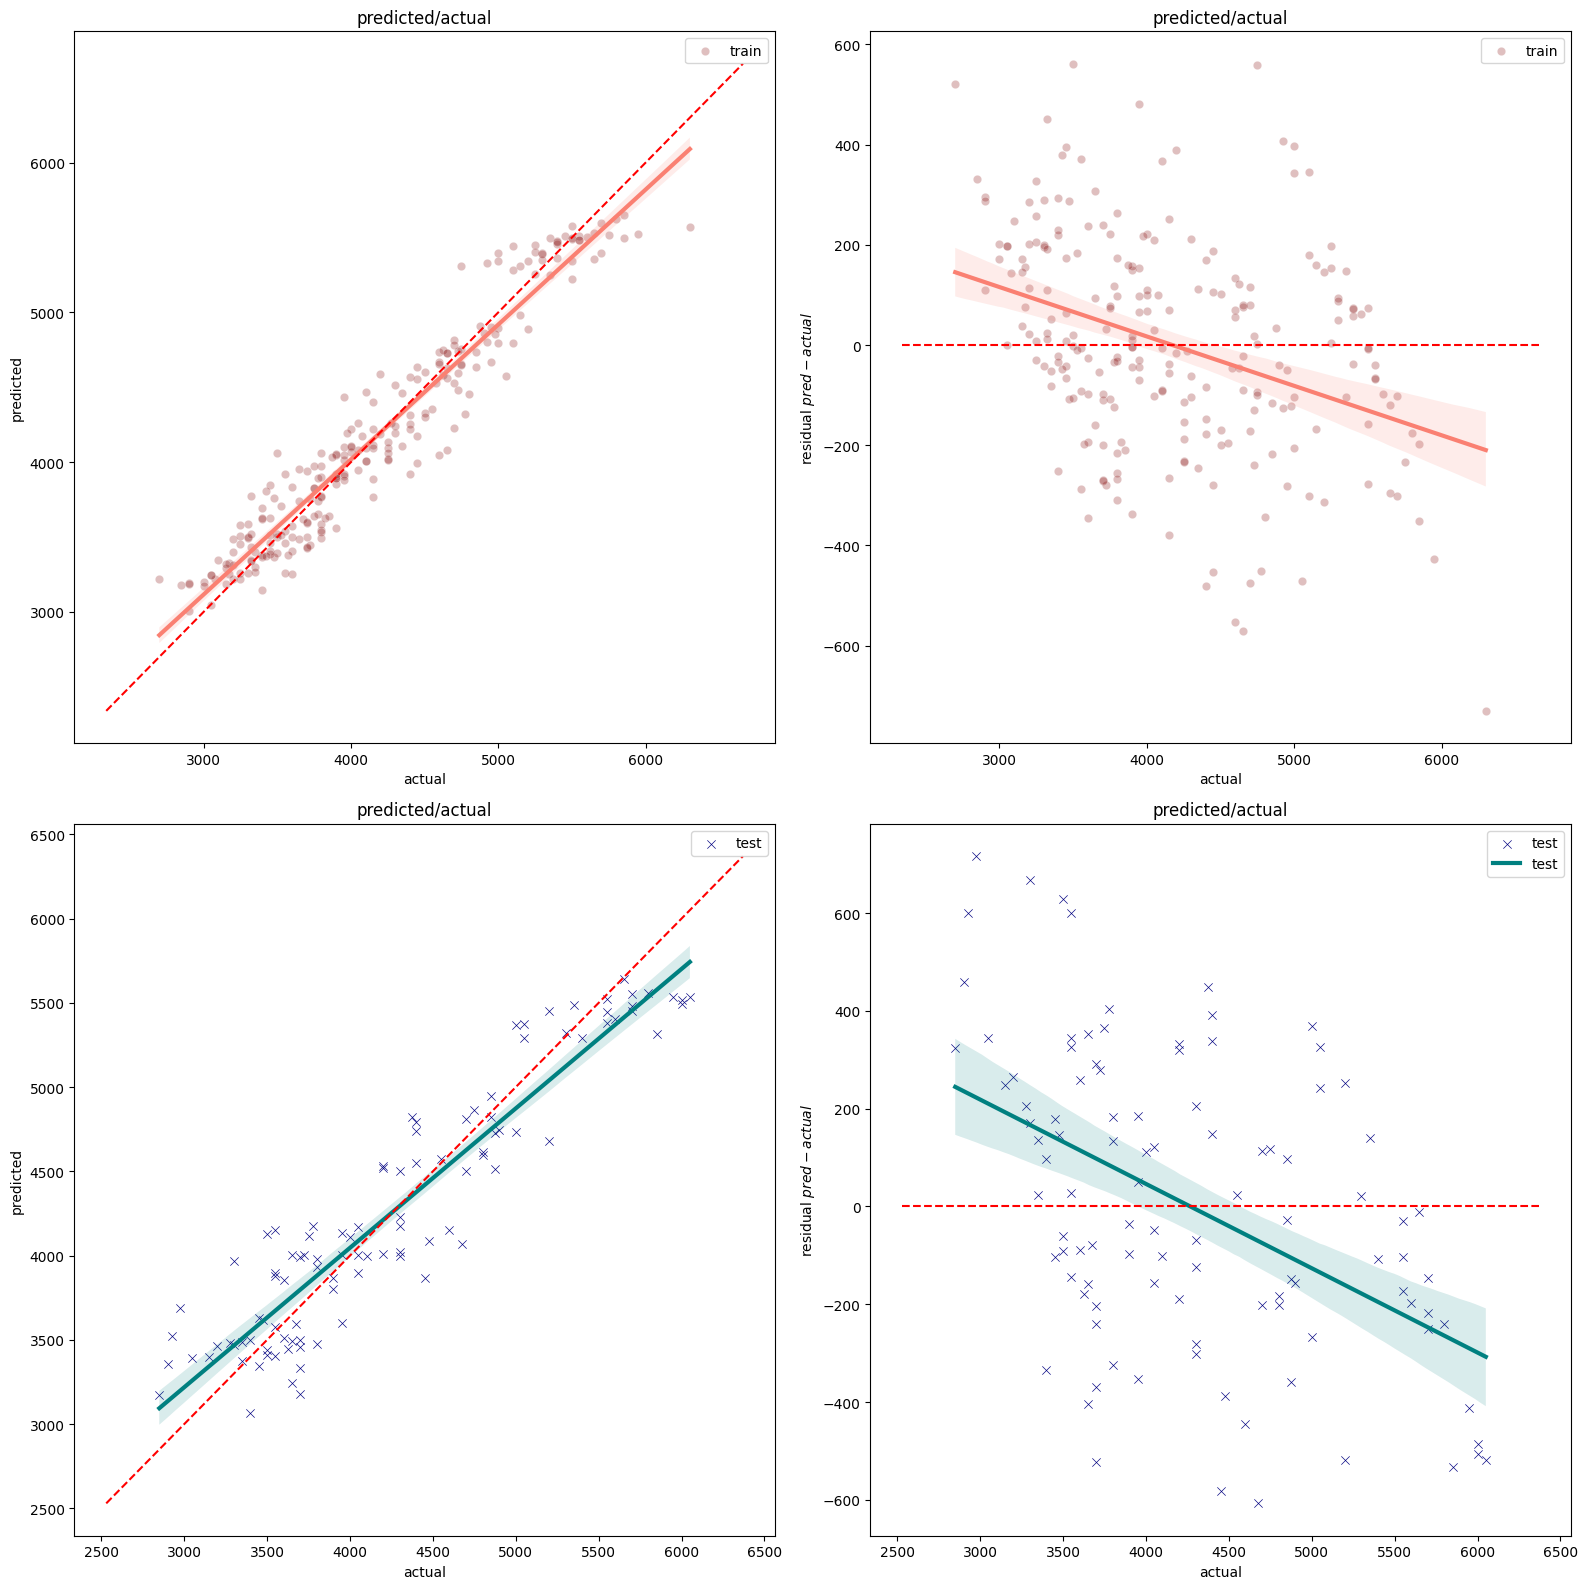

In [3]:
dataset = "penguins"
target = "body_mass_g"

df = sns.load_dataset(dataset)
df = df.dropna(subset=[target])
model = ll.core_regress_df(df, target)
result = model.get_evaluation()
model.display_evaluations()

In [4]:
model.display_feature_importance()

,Feature Id,Importances
0,species,33.730919
1,sex,28.510025
2,flipper_length_mm,15.687447
3,bill_depth_mm,9.694559
4,bill_length_mm,7.510131
5,island,4.226289
6,sex_is_missing,0.640629


,Feature Id,Importances
0,species,33.730919
1,sex,28.510025
2,flipper_length_mm,15.687447
3,bill_depth_mm,9.694559
4,bill_length_mm,7.510131
5,island,4.226289
6,sex_is_missing,0.640629


In [5]:
model.display_permutation_importance()

,mean,std
species,0.312279,0.023749
flipper_length_mm,0.280785,0.031338
sex,0.146771,0.031871
bill_length_mm,0.057958,0.012351
bill_depth_mm,0.051400,0.010830
island,0.044259,0.010580
sex_is_missing,-0.001814,0.001947


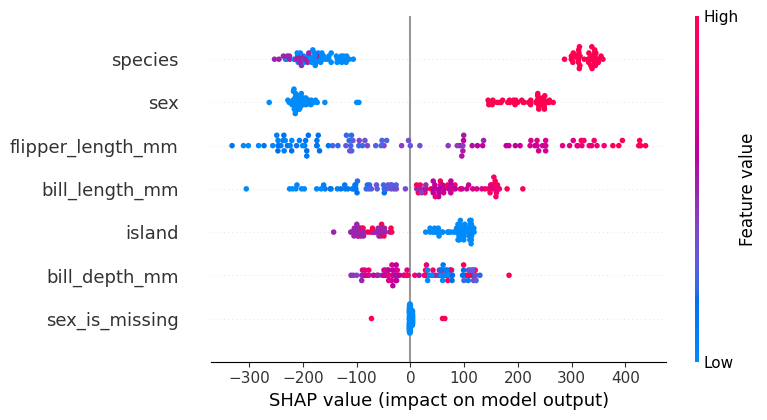

In [6]:
model.display_shap()

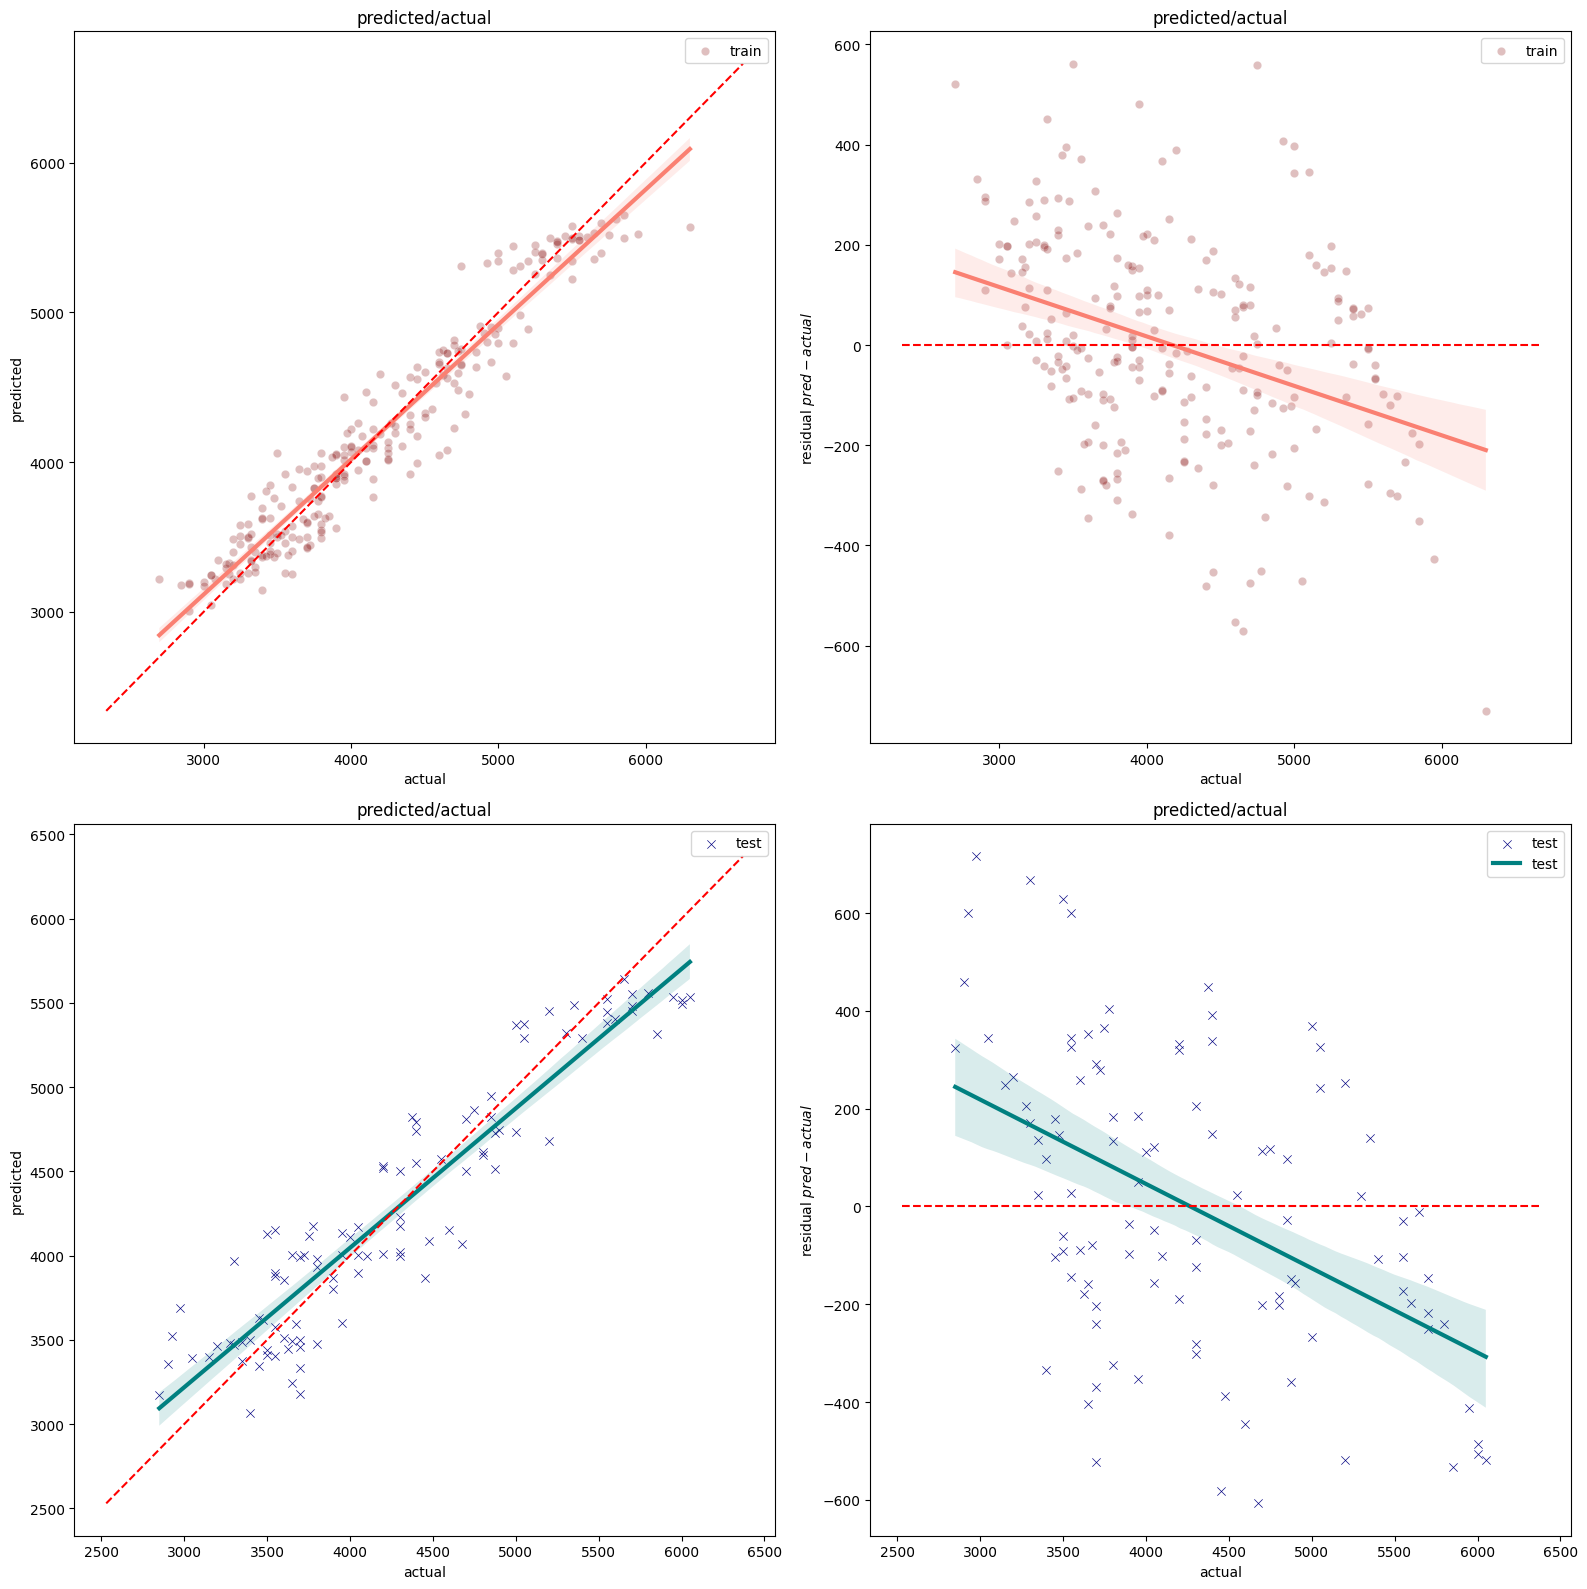

In [7]:
model.display_residuals()

In [8]:
reduced = model.progressive_permutation_feature_selection()

std= 1
threshold= 0
k= 5
std= 0
threshold= 0
k= 5
dropping columns:
                    mean       std  upper_estimate
sex_is_missing -0.001814  0.001947       -0.001814

[]
current performance:
             rmse  support
train  214.590700      239
test   304.209831      103

after dropping:
             rmse  support
train  209.778554      239
test   300.318437      103

error reduction (higher is better):
           rmse  support
train  4.812146        0
test   3.891394        0

std= -0.5
threshold= 0
k= 3
current performance:
             rmse  support
train  214.590700      239
test   304.209831      103

after dropping:
             rmse  support
train  209.778554      239
test   300.318437      103

error reduction (higher is better):
           rmse  support
train  4.812146        0
test   3.891394        0



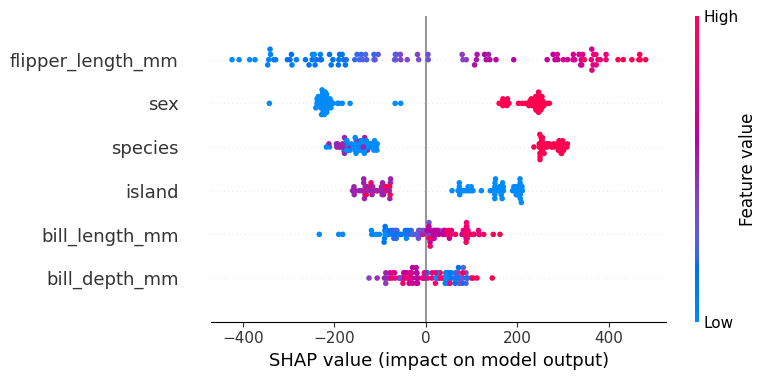

In [9]:
reduced[-1].display_shap()